# 1) Obtaining data and loading libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats

df=pd.read_csv('kc_house_data.csv')

#Inital look at df
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [2]:
#Initial observations
    #df has 21597 rows and 21 colums with various data types
    #columns waterfront, view and yr_renovated have missing values

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.078000e+04,10780.000000,10780.000000,10780.000000,10780.000000,1.078000e+04,10780.000000,9603.000000,10752.000000,10780.000000,10780.000000,10780.000000,10780.000000,8854.000000,10780.000000,10780.000000,10780.000000,10780.000000,10780.000000
mean,4.636896e+09,461616.965863,3.317718,2.063033,1929.317161,1.430150e+04,1.494573,0.002083,0.136719,3.383024,7.493321,1653.504360,1971.964935,63.498080,98081.404082,47.590187,-122.213694,1886.893043,12487.920315
std,2.855929e+09,89628.824135,0.915120,0.649967,646.853283,3.610232e+04,0.556855,0.045591,0.559959,0.624030,0.805890,628.382032,29.594355,350.121343,50.302997,0.130448,0.146409,508.645410,26853.969466
min,1.200021e+06,322200.000000,1.000000,0.750000,410.000000,6.000000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,410.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,748.000000
25%,2.224545e+09,385000.000000,3.000000,1.750000,1450.000000,4.652750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,1952.000000,0.000000,98034.000000,47.511600,-122.338000,1500.000000,4800.000000
50%,3.936900e+09,450000.000000,3.000000,2.250000,1860.000000,7.203000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1500.000000,1976.000000,0.000000,98074.000000,47.606000,-122.237000,1810.000000,7264.000000
75%,7.304301e+09,535000.000000,4.000000,2.500000,2330.000000,1.009800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2050.000000,1999.000000,0.000000,98118.000000,47.696800,-122.121000,2230.000000,9719.000000
max,9.895000e+09,644500.000000,33.000000,7.500000,5461.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,11.000000,5450.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.321000,4362.000000,438213.000000


# 2) Data cleaning + Data Exploration

## Dealing with missing values

In [5]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1177
view               28
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     1926
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
#columns waterfront, view and yr_renovated have missing values

#YR_RENOVATED
print(df.yr_renovated.value_counts().head())

# 17011 entries have the value of '0', which seems to be a placeholder for the fact the house has never been renovated
# there are 3842 NaNs - I will change these into 'not renovated', as that is the overwhelming value
#I will later make this columns categorical and bin the values

0.0       8572
2014.0      31
2013.0      11
2003.0      10
2005.0      10
Name: yr_renovated, dtype: int64


In [7]:
df.yr_renovated = df.yr_renovated.astype('str')
df.loc[df.yr_renovated == '0.0','yr_renovated'] = 'not renovated'
df.loc[df.yr_renovated == 'nan','yr_renovated'] = 'not renovated'

In [8]:
print(df.yr_renovated.isna().sum())

0


In [9]:
#VIEW
# this columns has 63 NaNs
# the overwhelming value in this column is 0 (19 422 out of 21 597)
# I will turn the missing values into '0'
# I will later make this columns categorical 

df.view.value_counts()
df.view = df.view.fillna(0.0)

In [10]:
#WATERFRONT
# overwhelming value: 0.0 (19075)
# NaNs = 2376
#For the sake of simplicty, I will drop this columns entirely as it will not provide much insight.
df = df.drop('waterfront',axis=1)

#While on it, I will also delete the date column, as we will not need that data
df = df.drop('date',axis=1)
#Now we have no obviuous missing values!
df.isna().sum()


id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Looking for placeholders

In [11]:
#checking for placeholders in individual columns
#I will later use scatter plots to check for other unusual values and outliers

for var in list(df.columns):
    print (df[var].value_counts())

9353300600    2
2561340020    2
3578401060    2
1250201165    2
1974300020    2
5101405604    2
6308000010    2
5430300171    2
2726049071    2
8564860270    2
4305200070    2
8648900110    2
9834200305    2
2767603612    2
641900050     2
1901600090    2
6791200120    2
8682262400    2
1232000810    2
8161020060    2
6751300375    2
705730280     2
7387500235    2
7524400250    2
1954420170    2
7853420110    2
9834200885    2
9238500040    2
3323059027    2
8910500150    2
             ..
5210200131    1
6181430800    1
7228500560    1
1032000079    1
4477000270    1
2211300260    1
6383000150    1
1021000060    1
4221250120    1
2817260130    1
291310180     1
3026059361    1
1160000115    1
6154900095    1
2770601677    1
5214500660    1
2595650170    1
3670500465    1
5727500301    1
686530110     1
5104511600    1
3904990570    1
2254501620    1
3226049134    1
200510060     1
1922069099    1
5450300010    1
638100073     1
8024202350    1
263000155     1
Name: id, Length: 10744,

47.6904    15
47.6860    12
47.6955    12
47.5491    12
47.6988    12
47.6727    12
47.6914    11
47.5659    11
47.6872    11
47.6970    11
47.5322    11
47.6844    11
47.7735    11
47.6719    11
47.5342    10
47.6892    10
47.6711    10
47.6968    10
47.6870    10
47.6536    10
47.6647    10
47.7326    10
47.6875    10
47.6729    10
47.7281    10
47.6827     9
47.7443     9
47.6842     9
47.7466     9
47.6700     9
           ..
47.2079     1
47.7215     1
47.3925     1
47.7524     1
47.4223     1
47.5992     1
47.4620     1
47.3906     1
47.6596     1
47.6312     1
47.7124     1
47.5608     1
47.7531     1
47.3866     1
47.5127     1
47.3544     1
47.6133     1
47.3888     1
47.3378     1
47.3772     1
47.5679     1
47.2964     1
47.6008     1
47.3111     1
47.4389     1
47.7658     1
47.2810     1
47.4677     1
47.4733     1
47.4423     1
Name: lat, Length: 3975, dtype: int64
-122.375    64
-122.365    62
-122.384    62
-122.387    61
-122.298    59
-122.348    59
-122.300    59
-12

In [12]:
#sqft_basement
# There are 454 '?' values in this dataset. That is a relatively small amount.
#I will first replace '?' with Nan
df.sqft_basement = df.sqft_basement.replace('?',np.nan)

#Now I will turn the columns into float and then replace the missing value with the median - which is 0!
df.sqft_basement = df.sqft_basement.astype('float64')
df.sqft_basement = df.sqft_basement.fillna(df.sqft_basement.median())

#I will make this column categorical and turn '0' into a category of "no basement"

In [13]:
df.sqft_basement.describe()

count    10780.000000
mean       269.980334
std        397.625977
min          0.000000
25%          0.000000
50%          0.000000
75%        520.000000
max       2196.000000
Name: sqft_basement, dtype: float64

## Checking columns types

In [14]:
#CHECKING COLUMN TYPES 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10780 entries, 1 to 21596
Data columns (total 19 columns):
id               10780 non-null int64
price            10780 non-null float64
bedrooms         10780 non-null int64
bathrooms        10780 non-null float64
sqft_living      10780 non-null int64
sqft_lot         10780 non-null int64
floors           10780 non-null float64
view             10780 non-null float64
condition        10780 non-null int64
grade            10780 non-null int64
sqft_above       10780 non-null int64
sqft_basement    10780 non-null float64
yr_built         10780 non-null int64
yr_renovated     10780 non-null object
zipcode          10780 non-null int64
lat              10780 non-null float64
long             10780 non-null float64
sqft_living15    10780 non-null int64
sqft_lot15       10780 non-null int64
dtypes: float64(7), int64(11), object(1)
memory usage: 1.6+ MB


In [15]:
# I will turn column zipcode into strings(objects) as they are categorical variables
df.zipcode = df.zipcode.astype('str')

#I will turn View into integer
df.view = df.view.astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10780 entries, 1 to 21596
Data columns (total 19 columns):
id               10780 non-null int64
price            10780 non-null float64
bedrooms         10780 non-null int64
bathrooms        10780 non-null float64
sqft_living      10780 non-null int64
sqft_lot         10780 non-null int64
floors           10780 non-null float64
view             10780 non-null int64
condition        10780 non-null int64
grade            10780 non-null int64
sqft_above       10780 non-null int64
sqft_basement    10780 non-null float64
yr_built         10780 non-null int64
yr_renovated     10780 non-null object
zipcode          10780 non-null object
lat              10780 non-null float64
long             10780 non-null float64
sqft_living15    10780 non-null int64
sqft_lot15       10780 non-null int64
dtypes: float64(6), int64(11), object(2)
memory usage: 1.6+ MB


## Initial Data Exploration and Removing outliers

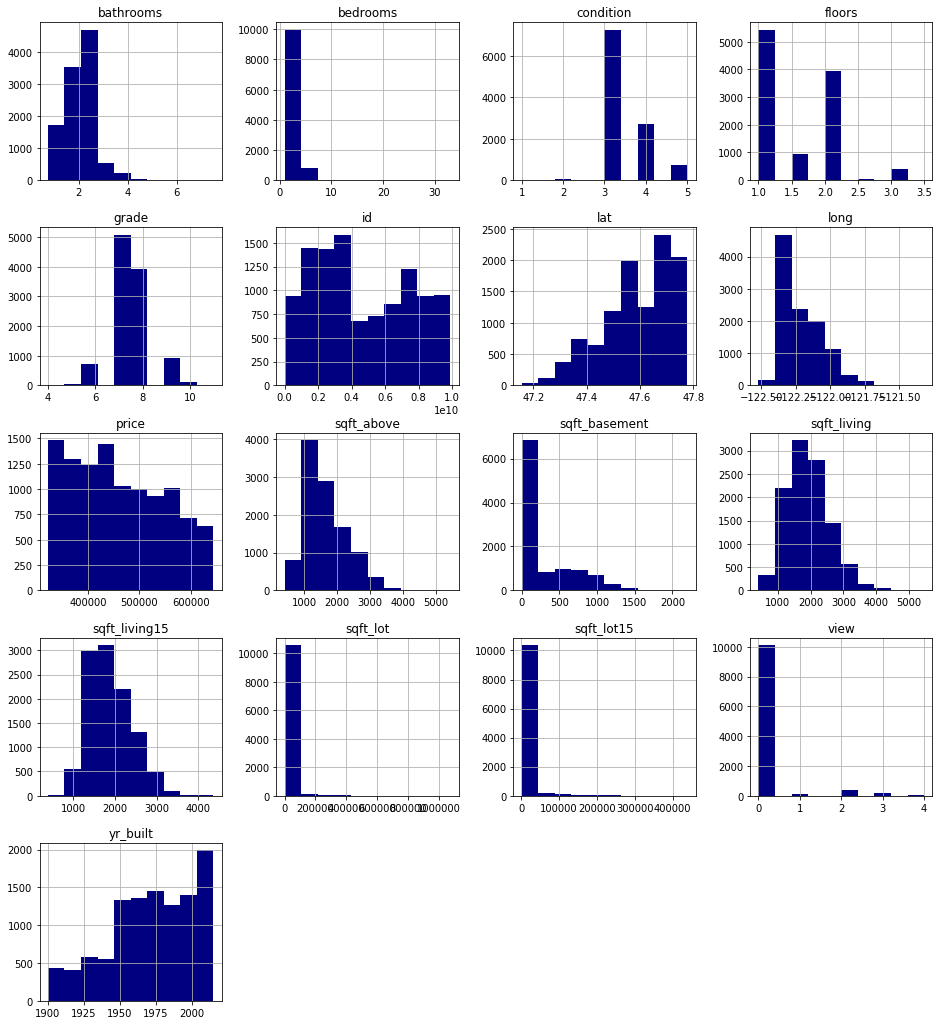

In [16]:
#QUICK VISUALISATIONS
df.hist(figsize=(16,18),color='navy');
# columns such as bedrooms, price, sqft_lot, sqft_above, sqft_basement and sqft_lot15 seem to have some outliers
# columns condition, floors, grade, bathrooms, view and bathrooms look like categorical variables


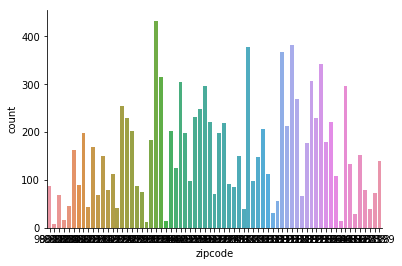

In [17]:
sns.countplot(df['zipcode'])
sns.despine();
#properties in zipocdes are not evenly distributed, but that was expected
#no zipcode category contains more than 600 houses

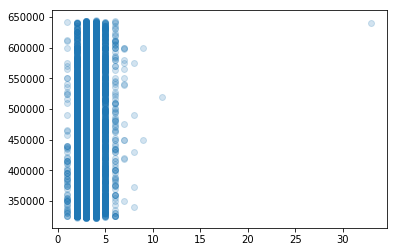

In [18]:
# after a quick look at different scatterplots, I have identified some outliers
plt.scatter(df.bedrooms,df.price, alpha = 0.2)
plt.show()

In [19]:
#looking for outliers
df.describe()
#there is a house with 33 bedrooms
#let's have a look at it
df.loc[df.bedrooms > 15] 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,640000.0,33,1.75,1620,6000,1.0,0,5,7,1040,580.0,1947,not renovated,98103,47.6878,-122.331,1330,4700


In [20]:
#I will remove this house from the dataset
df = df.drop([15856])

In [21]:
#also, there are 7 houses sold for more than $5 000 000
#let's have a look at them
df.loc[df.price > 5000000]
#as we can see, there are only two houses in that category, which are skewing our dataset
#median price: $450 000
#mean price: $540 296

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [22]:
#I will drop these houses from the dataset
df = df.drop([3910])
df = df.drop([7245])
df = df.drop([9245])

KeyError: '[3910] not found in axis'

In [ ]:
#dropping houses above $5 mil
df = df.drop([1162])
df = df.drop([1313])
df = df.drop([1446])
df = df.drop([4407])

In [ ]:
#Outliers in sqft_living
df.loc[df.sqft_living > 8000]
#There are only 4 properties with sgft_living value above 8000 sqft
#The value of the largest property is $2,280,000
#I will remove this property from the dataset


In [ ]:
plt.scatter(df.sqft_living,df.price, alpha = 0.2)
plt.show()

In [23]:
df = df.drop([12764])
df = df.drop([8085])
df = df.drop([18288])
df = df.drop([14542])

KeyError: '[12764] not found in axis'

In [24]:
#Basement
df.loc[df.sqft_basement > 3000]
# there are only 2 properties with basement larget than 3000 sqft
# I will remove them from the dataset

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


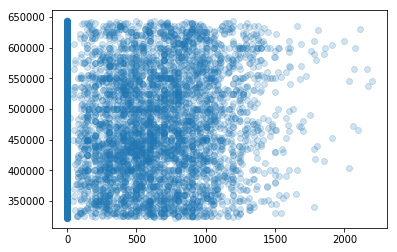

In [25]:
plt.scatter(df.sqft_basement,df.price, alpha = 0.2)
plt.show()

In [26]:
df = df.drop([10074])
df = df.drop([15468])

KeyError: '[10074] not found in axis'

In [27]:
#sqft_lot
#there are only 4 properties with lots larget than 1 000 000 sqft
df.loc[df.sqft_lot > 1000000]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7640,2623069031,542500.0,5,3.25,3010,1074218,1.5,0,5,8,2010,1000.0,1931,not renovated,98027,47.4564,-122.004,2450,68825


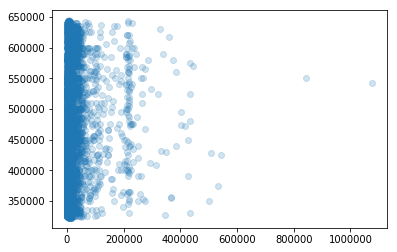

In [28]:
plt.scatter(df.sqft_lot,df.price, alpha = 0.2)
plt.show()

In [29]:
df = df.drop([1717])
df = df.drop([7640])
df = df.drop([7762])
df = df.drop([17305])

KeyError: '[1717] not found in axis'

In [30]:
# there are only 3 properties with lot15 larger than 500 000 sqft
df.loc[df.sqft_lot15 > 500000]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


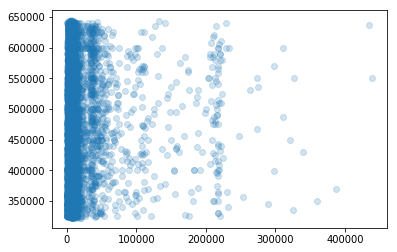

In [31]:
plt.scatter(df.sqft_lot15,df.price, alpha = 0.2)
plt.show()

In [ ]:
df = df.drop([9705])
df = df.drop([13451])
df = df.drop([20436])

## Multicollinearity

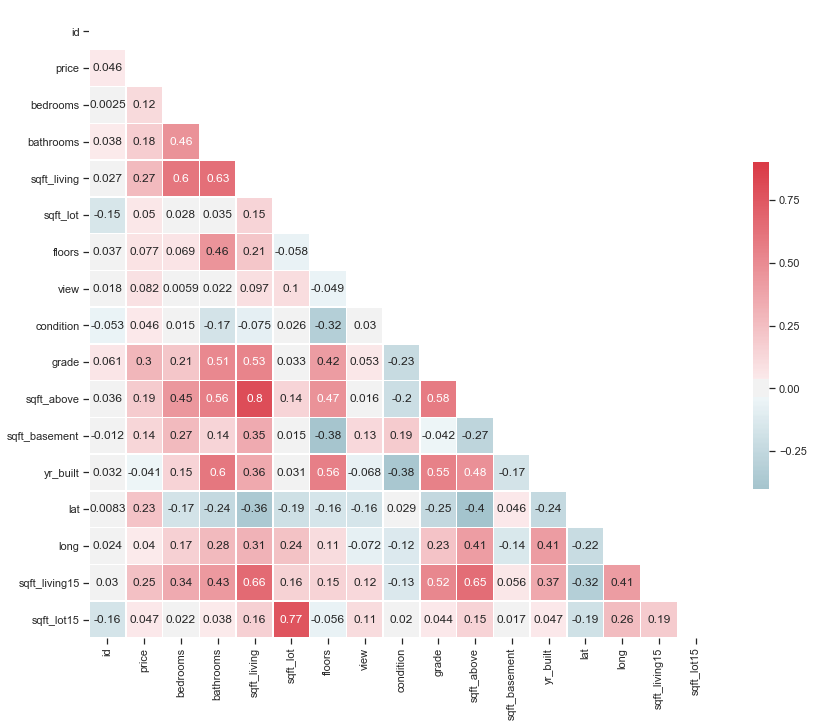

In [32]:
# checking for MULTICOLLINEARITY


sns.set(style="ticks")
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(14, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, annot=True,cbar_kws={"shrink": .5});

In [ ]:
# columns 'sqft_living' and 'sqft_above' have correlation of 0.87
# looking at the 5 point statistics, their values seems to be roughly similar, they indeed look they describe the same
df.describe()

In [33]:
# I will therefore drop the 'sqft_above' column
df = df.drop('sqft_above',axis=1)

# I will also drop the ID column
df = df.drop('id',axis=1)

## Transforming numerical variables

In [ ]:
#Log transforming data
#df.sqft_living = np.log(df.sqft_living)
#df.sqft_lot = np.log(df.sqft_lot)

#df.sqft_living15 = np.log(df.sqft_living15)
#df.sqft_lot15 = np.log(df.sqft_lot15)

#sqft_basement has zero values - what should I do with it?

In [ ]:
#Standardisation/Normalisation
#all numerical columns: sqft_living,sqft_lot, sqft_living15, sqft_lot15
#df.sqft_living = (df.sqft_living - df.sqft_living.mean()) / df.sqft_living.std()
#df.sqft_lot = (df.sqft_lot - df.sqft_lot.mean()) / df.sqft_lot.std()

#df.sqft_lot15 = (df.sqft_lot15 - df.sqft_lot15.mean()) / df.sqft_lot15.std()
#df.sqft_living15 = (df.sqft_living15 - df.sqft_living15.mean()) / df.sqft_living15.std()

In [ ]:
#experiment: transforming target variable
df.price = np.log(df.price)


In [ ]:
#df.price = (df.price - df.price.mean()) / df.price.std()

In [ ]:
#TESTING ASSUMPTIONS FOR LINEAR REGRESSION

list_of_columns = list(df.columns)

for column in list_of_columns:
    plt.scatter(df[column],df.price, alpha =0.2)
    plt.xlabel(column)
    plt.show()

In [ ]:
#observations
    #sqft_living does not seem very linear (exponential, perhaps?), also has some outliers
    #sqft_basement will be a categotical variable, as there are too many 0 values for properties without basement
    #the same applies for yr_renovated
    #lat has many outliers in terms of high price (350 000+), but has a slighly linear relationship
        #northern properties have generaly bigger value than southern
        # peak between 47.55 and 47.65
    #long does not have a linear relationship, value of properties peak at -122.2 and then decrease

In [ ]:
df.info()

## Preparing categorical variables

In [34]:
#DEALING WITH CATEGORICAL VARIABLES
# bedrooms
# bathrooms
# floors
# view
# condition
# grade


for var in ['bedrooms','bathrooms','floors','view','condition','grade']:
    print (df[var].value_counts())

3     5157
4     3247
2     1487
5      685
6      104
1       76
7       15
8        5
9        2
11       1
Name: bedrooms, dtype: int64
2.50    3003
1.75    1778
1.00    1707
2.25    1151
2.00    1063
1.50     705
2.75     547
3.00     358
3.50     195
3.25     175
0.75      25
3.75      21
4.50      16
4.00      16
4.25       5
1.25       5
5.00       4
4.75       2
7.50       1
5.75       1
5.25       1
Name: bathrooms, dtype: int64
1.0    5428
2.0    3954
1.5     928
3.0     408
2.5      55
3.5       6
Name: floors, dtype: int64
0    10096
2      370
3      153
1      123
4       37
Name: view, dtype: int64
3    7257
4    2718
5     741
2      53
1      10
Name: condition, dtype: int64
7     5069
8     3922
9      922
6      703
10     109
5       41
11       7
4        6
Name: grade, dtype: int64


In [35]:
#columns condition, view, floors are distributed within less than 7 numbers - I will simply turn them into categories now
#I will also add zipcode
df.condition = df.condition.astype('category')
df.view = df.view.astype('category')
df.floors = df.floors.astype('category')

#creating dummy columns
condition_dummies = pd.get_dummies(df.condition,prefix='cond')
view_dummies = pd.get_dummies(df.view,prefix='view')
floors_dummies = pd.get_dummies(df.floors,prefix='flo')


#removing original columns
df = df.drop(["condition","view","floors"], axis=1)

#adding dummy columns
df = pd.concat([df, condition_dummies, view_dummies, floors_dummies], axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10779 entries, 1 to 21596
Data columns (total 30 columns):
price            10779 non-null float64
bedrooms         10779 non-null int64
bathrooms        10779 non-null float64
sqft_living      10779 non-null int64
sqft_lot         10779 non-null int64
grade            10779 non-null int64
sqft_basement    10779 non-null float64
yr_built         10779 non-null int64
yr_renovated     10779 non-null object
zipcode          10779 non-null object
lat              10779 non-null float64
long             10779 non-null float64
sqft_living15    10779 non-null int64
sqft_lot15       10779 non-null int64
cond_1           10779 non-null uint8
cond_2           10779 non-null uint8
cond_3           10779 non-null uint8
cond_4           10779 non-null uint8
cond_5           10779 non-null uint8
view_0           10779 non-null uint8
view_1           10779 non-null uint8
view_2           10779 non-null uint8
view_3           10779 non-null uint8
view_

In [36]:
#turning yr_renoved into numerical
#I am replacing the 'not renovated' values into the corresponding 'yr_built value'.
#This columns now represent the age of the house taking into consideration renovations
#The Person's correlation coefficient is now 0.93! I will drop the 'yr_built' category now.
df.yr_renovated.value_counts()
df.loc[df.yr_renovated == 'not renovated','yr_renovated'] = df['yr_built']
df.yr_renovated = df.yr_renovated.astype('float64')



In [37]:
df = df.drop('yr_built', axis = 1)

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


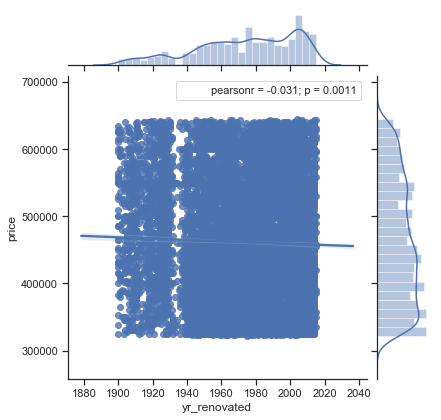

In [38]:
from scipy.stats import pearsonr
sns.jointplot(x='yr_renovated', y='price', data=df, kind = 'reg', stat_func=pearsonr)

In [39]:
df.bedrooms = df.bedrooms.astype('float64')
df.grade = df.grade.astype('float64')

bedrooms_bins = [0,2,3,4,5,11]
bathrooms_bins = [0,1,2,3,4,5,8]
grade_bins = [0,6,7,8,9,10,11,14]

yr_renovated_bins = [1900,1920,1940,1960,1980,2000,2010,2020]
sqft_basement_bins = [0,500,1000,6000]

In [40]:
# using pd.cut
bins_bedrooms = pd.cut(df['bedrooms'], bedrooms_bins)
bins_bathrooms = pd.cut(df['bathrooms'], bathrooms_bins)
bins_grade = pd.cut(df['grade'], grade_bins)


bins_yr_renovated = pd.cut(df['yr_renovated'], yr_renovated_bins)
bins_sqft_basement = pd.cut(df['sqft_basement'], sqft_basement_bins)

In [41]:
# using pd.cut returns unordered categories. Transform this to ordered categories.
bins_bedrooms = bins_bedrooms.cat.as_unordered()
bins_bathrooms = bins_bathrooms.cat.as_unordered()
bins_grade = bins_grade.cat.as_unordered()

bins_yr_renovated = bins_yr_renovated.cat.as_unordered()

bins_sqft_basement = bins_sqft_basement.cat.as_unordered()

In [42]:
# replace the existing columns
df['bedrooms']=bins_bedrooms
df['bathrooms']=bins_bathrooms
df['grade']=bins_grade


df['yr_renovated']=bins_yr_renovated

df['sqft_basement'] = bins_sqft_basement

In [43]:
#LABEL ENCODING

df['bedrooms'] = df['bedrooms'].cat.codes
df['bathrooms'] = df['bathrooms'].cat.codes
df['grade'] = df['grade'].cat.codes

df['yr_renovated'] = df['yr_renovated'].cat.codes

df['sqft_basement'] = df['sqft_basement'].cat.codes

In [44]:
#CREATING DUMMY VARIABLES

bathrooms_dummy = pd.get_dummies(df['bathrooms'], prefix="bath")
bedrooms_dummy = pd.get_dummies(df['bedrooms'], prefix="bed")
grade_dummy = pd.get_dummies(df['grade'], prefix="grade")


yr_renovated_dummy = pd.get_dummies(df['yr_renovated'], prefix="reno")

sqft_basement_dummy = pd.get_dummies(df['sqft_basement'], prefix= "base")

In [45]:
add_series = [df,bathrooms_dummy, bedrooms_dummy, grade_dummy, sqft_basement_dummy,yr_renovated_dummy]
df = pd.concat(add_series, axis=1)


In [46]:
#removing original columns
df = df.drop(["bedrooms","bathrooms","grade", "yr_renovated","sqft_basement"], axis=1)


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10779 entries, 1 to 21596
Data columns (total 53 columns):
price            10779 non-null float64
sqft_living      10779 non-null int64
sqft_lot         10779 non-null int64
zipcode          10779 non-null object
lat              10779 non-null float64
long             10779 non-null float64
sqft_living15    10779 non-null int64
sqft_lot15       10779 non-null int64
cond_1           10779 non-null uint8
cond_2           10779 non-null uint8
cond_3           10779 non-null uint8
cond_4           10779 non-null uint8
cond_5           10779 non-null uint8
view_0           10779 non-null uint8
view_1           10779 non-null uint8
view_2           10779 non-null uint8
view_3           10779 non-null uint8
view_4           10779 non-null uint8
flo_1.0          10779 non-null uint8
flo_1.5          10779 non-null uint8
flo_2.0          10779 non-null uint8
flo_2.5          10779 non-null uint8
flo_3.0          10779 non-null uint8
flo_3.5   

In [ ]:
df.info()

# 3) Modeling data

In [48]:
#RENAMING FLOORS COLUMNS

df = df.rename(columns={'flo_1.0': 'flo10','flo_1.5': 'flo15','flo_2.0': 'flo20','flo_2.5': 'flo25','flo_3.0': 'flo30','flo_3.5': 'flo35'})

In [49]:
df = df.rename(columns={'base_-1':'baseminus1','base_0':'base0','base_1':'base1','base_2':'base2'})


In [50]:
df = df.rename(columns={'reno_-1':'renominus1','reno_0':'reno0','reno_1':'reno1','reno_2':'reno2','reno_3':'reno3','reno_4':'reno4','reno_5':'reno5','reno_6':'reno6'})

In [51]:
df = df.rename(columns={'bed_-1':'bedminus1'})

In [52]:
len(df.columns)

53

In [ ]:
# intial run (outliers removed) 0.824, 0.823
# with outliers: 0.816, 0.815
# after removing id column: 0.826
# after removing houses above £5 mil 0.826,0.825
# after transforming target variable: 0.885, 0.885
# without creating cat variables 0.879
# without zipcodes 0.775

In [53]:
df = df.drop('long', axis =1)
df = df.drop('zipcode', axis =1)
# dropping these variables imporoved the distributions of my residual errors

In [54]:
df = df.drop('cond_5',axis=1)
df = df.drop('view_4',axis=1)
df = df.drop('flo35',axis=1)
df = df.drop('bath_5',axis=1)
df = df.drop('bed_4',axis=1)
df = df.drop('grade_6',axis=1)
df = df.drop('base2',axis=1)
df = df.drop('reno6',axis=1)

KeyError: "['grade_6'] not found in axis"

In [ ]:
df.info()

In [55]:
from statsmodels.formula.api import ols

outcome = 'price'
predictors = df.drop('price', axis=1)

pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [56]:
model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     127.7
Date:                Sun, 16 Jun 2019   Prob (F-statistic):               0.00
Time:                        18:55:59   Log-Likelihood:            -1.3603e+05
No. Observations:               10779   AIC:                         2.721e+05
Df Residuals:                   10736   BIC:                         2.725e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.604e+06   1.97e+05    -43.611      0.000   -8.99e+06   -8.22e+06
sqft_living      32.4486      2.236     14.513      0.000      28.066      36.831
sqft_lot          0.1472      0.031      4.789      0.000       0.087       0.207
lat            2.906e+05   6270.394     46.343      0.000    2.78e+05    3.03e+05
sqft_living15    25.9787      2.091     12.424      0.000      21.880      30.077
sqft_lot15        0.0888      0.042      2.126      0.034       0.007       0.171
cond_1        -2.341e+04   2.35e+04     -0.996      0.319   -6.95e+04    2.27e+04
cond_2        -2.295e+04   1.05e+04     -2.187      0.029   -4.35e+04   -2379.729
cond_3        -2.809e+04   3048.828     -9.215      0.000   -3.41e+04   -2.21e+04
cond_4        -1.356e+04   3083.311     -4.397      0.000   -1.96e+04   -7512.740
view_0        -5.536e+04   1.22e+04     -4.548      0.000   -7.92e+04   -3.15e+04
view_1        -3.477e+04   1.38e+04     -2.518      0.012   -6.18e+04   -7700.196
view_2        -3.395e+04   1.27e+04     -2.675      0.007   -5.88e+04   -9068.760
view_3        -2.711e+04   1.35e+04     -2.012      0.044   -5.35e+04    -699.550
flo10         -6.006e+04   3.01e+04     -1.993      0.046   -1.19e+05   -1003.384
flo15         -4.607e+04   3.02e+04     -1.524      0.127   -1.05e+05    1.32e+04
flo20         -5.787e+04      3e+04     -1.926      0.054   -1.17e+05    1018.341
flo25         -3.629e+04   3.16e+04     -1.148      0.251   -9.83e+04    2.57e+04
flo30         -4.937e+04   3.02e+04     -1.636      0.102   -1.09e+05    9784.980
bath_0         -5.67e+04   4.32e+04     -1.312      0.190   -1.41e+05     2.8e+04
bath_1        -4.716e+04   4.31e+04     -1.094      0.274   -1.32e+05    3.74e+04
bath_2        -4.524e+04    4.3e+04     -1.051      0.293    -1.3e+05    3.91e+04
bath_3        -3.783e+04   4.31e+04     -0.877      0.380   -1.22e+05    4.67e+04
bath_4        -3.056e+04   4.49e+04     -0.681      0.496   -1.18e+05    5.74e+04
bed_0          1.845e+04   7577.366      2.435      0.015    3595.674    3.33e+04
bed_1          1.061e+04   7157.728      1.482      0.138   -3423.034    2.46e+04
bed_2          8781.2193   7066.404      1.243      0.214   -5070.239    2.26e+04
bed_3          5437.2526   7372.005      0.738      0.461   -9013.241    1.99e+04
grade_0       -1.513e+06   3.33e+04    -45.438      0.000   -1.58e+06   -1.45e+06
grade_1       -1.478e+06   3.34e+04    -44.261      0.000   -1.54e+06   -1.41e+06
grade_2        -1.44e+06   3.33e+04    -43.179      0.000    -1.5e+06   -1.37e+06
grade_3       -1.411e+06   3.34e+04    -42.288      0.000   -1.48e+06   -1.35e+06
grade_4       -1.395e+06   3.37e+04    -41.451      0.000   -1.46e+06   -1.33e+06
grade_5       -1.368e+06   4.03e+04    -33.986      0.000   -1.45e+06   -1.29e+06
baseminus1    -2.158e+06   4.92e+04    -43.866   

In [ ]:
#removing these features from the dataset based on their high p-value did not produce any difference in R-squared
#high_p_values = ['id', 'lat', 'sqft_lot15', 'zip_98102', 'zip_98119']
#df_reduced = df.drop(high_p_values, axis=1)
#Skew: -0.2 symmetrical
#Kurtosis: 5.7 - high, leptokurtic, sign of outliers?

In [ ]:
df.describe()

## Regression Assumption Testing

In [ ]:
# Normality assumption
# the normality assumption talks about the model residuals and not about the distributions of the variables

residuals = model.resid
residuals_plot = sm.graphics.qqplot(residuals, dist=stats.norm, line ='45', fit=True)



In [ ]:
# Normal Q-Q plots that exhibit this behavior usually mean your data have more extreme values than would be expected


In [ ]:


fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'lat', fig=fig)
plt.show()

#heteroscedastic: lat,long

In [ ]:
x_cols = df.columns
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))])
#overall, the model seems homoscedastic
#some large errors below -2 price

# 4) Model Validation

In [ ]:
#inspect which 5 variables explain .3 of prices!
#perhaps drop a columns for each category?
#https://www.datacamp.com/community/tutorials/feature-selection-python

In [ ]:
# When using a train test split, we'll compare your residuals for both test set and training set
# A big difference in value between the test and training set (R)MSE is an indication of overfitting

## train-test-split with Scikit-learn

In [ ]:
y = subset[["price"]]
X = subset.drop(["price"], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(len(X_train), len(X_test), len(y_train), len(y_test))

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

#linreg.predict will plot create a new variable y_hat with contains the predicted house prices based on our 
#training and testing models

In [ ]:
# this equation takes in the the differences between the predicted and the original value**2,
# divides them by the number of observations and sums them up = MSE
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('TRAIN Mean Squarred Error:', mse_train)
print('TEST Mean Squarred Error:', mse_test)

In [ ]:
print('Difference between train and test MSE:', mse_test-mse_train)

## cross-validation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
import matplotlib.pyplot as plt

num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

## K-fold cross validation

In [ ]:
# I will not perform the K-fold cross validation, which takes in combinations of testing and training data
# across entire dataset. This way we test all data against its remaining data.
# Cross-validation MSE = average of individual results

from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))


In [ ]:
k_fold_result = abs(cv_5_results)

In [ ]:
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.scatter(11,k_fold_result,color='red')
plt.legend();                                   


In [ ]:
np.exp(-5.3)